In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


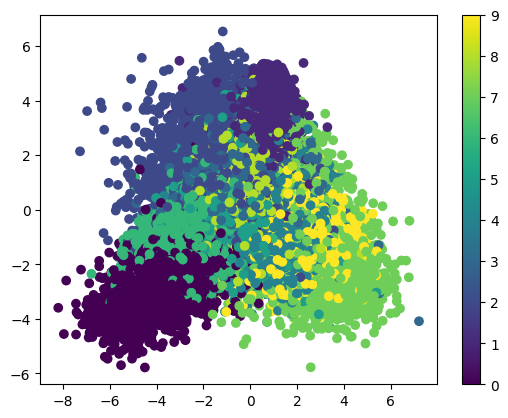

In [2]:
#loading the data and splitting it 
mnist = fetch_openml('mnist_784')
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)
#applying lda to the data and plotting it
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train.astype(int), cmap='viridis')
plt.colorbar()
plt.show()


In [3]:
#using KNN classfier to check the accuracy of LDA 
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target.astype(int), test_size=0.2, random_state=42)
lda = LDA(n_components=9)
X_train_lda = lda.fit_transform(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_lda, y_train)
X_test_lda = lda.transform(X_test)
y_pred = knn.predict(X_test_lda)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy: {:.2f}%".format(accuracy*100))

accuracy: 91.61%


In [4]:
#Secound Method 

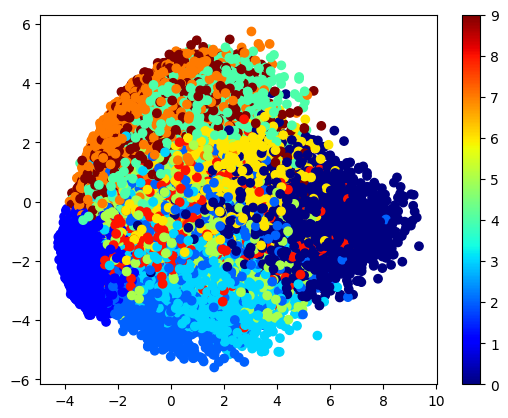

In [5]:
#Same method but using PCA 
mnist = fetch_openml('mnist_784')
X = mnist.data / 255.0
y = mnist.target.astype(int)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='jet')
plt.colorbar()
plt.show()


In [6]:
#using KNN classfier to check the accuracy of PCA 
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target.astype(int), test_size=0.2, random_state=42)
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)
X_test_pca = pca.transform(X_test)
y_pred = knn.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy: {:.2f}%".format(accuracy*100))




accuracy: 97.41%
